In [1]:
from keras.datasets.fashion_mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.
C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\tensorflo

In [2]:
trans = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

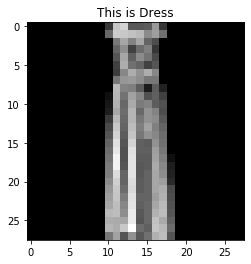

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import random

idx = random.randint(0, 59999)
plt.title("This is {}".format(trans[y_train[idx]]))
plt.imshow(x_train[idx], cmap = "gray")

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(128, activation = "relu", input_dim = 784)) # 128 -> 784/10 or 784/4 
model.add(Dropout(0.25))
model.add(Dense(10, activation = "softmax"))
model.summary()

W1230 11:42:14.580651  7820 deprecation_wrapper.py:119] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1230 11:42:14.601593  7820 deprecation_wrapper.py:119] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1230 11:42:14.604585  7820 deprecation_wrapper.py:119] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1230 11:42:14.624531  7820 deprecation_wrapper.py:119] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1230 11:42:14.633

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

W1230 11:42:14.683382  7820 deprecation_wrapper.py:119] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1230 11:42:14.714292  7820 deprecation_wrapper.py:119] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
# The reason for normalizing is that the random weights need a fixed input interval.
# Caffe: No normalize , tensorflow: -1~1 or 0~1
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255

from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10) # prevent missing some values

In [7]:
# batch_size: number of samples processed before the model is updated
# small picture (100*100): 100~200  
# median picture (300*300): 10~20 、 
# big picture (500*500): 1~5
# epochs: the number of complete passes through the training dataset
# verbose: default is 1 (most logs), here set 2 (essential logs)
# 5 * ((60000 - 6000) / 200) 

model.fit(x_train_norm, y_train_cat,
         batch_size = 200,
         epochs = 18,
         validation_split = 0.1,
         verbose = 2)

# Use the validation set to see whether the val_loss becomes smooth and decide the epochs
# If using train loss to decide epochs, there may be overfitting problems
# Moreover, the train loss may decrease continuously (cannot be smooth)

# If I run the cell again, the learning will inherit last results

W1230 11:42:15.081141  7820 deprecation.py:323] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/18
 - 1s - loss: 0.6751 - acc: 0.7666 - val_loss: 0.4556 - val_acc: 0.8410
Epoch 2/18
 - 1s - loss: 0.4543 - acc: 0.8398 - val_loss: 0.4002 - val_acc: 0.8555
Epoch 3/18
 - 1s - loss: 0.4075 - acc: 0.8570 - val_loss: 0.3758 - val_acc: 0.8635
Epoch 4/18
 - 1s - loss: 0.3788 - acc: 0.8643 - val_loss: 0.3795 - val_acc: 0.8653
Epoch 5/18
 - 1s - loss: 0.3630 - acc: 0.8697 - val_loss: 0.3530 - val_acc: 0.8735
Epoch 6/18
 - 1s - loss: 0.3451 - acc: 0.8755 - val_loss: 0.3434 - val_acc: 0.8722
Epoch 7/18
 - 1s - loss: 0.3328 - acc: 0.8796 - val_loss: 0.3348 - val_acc: 0.8790
Epoch 8/18
 - 1s - loss: 0.3211 - acc: 0.8833 - val_loss: 0.3328 - val_acc: 0.8805
Epoch 9/18
 - 1s - loss: 0.3161 - acc: 0.8866 - val_loss: 0.3199 - val_acc: 0.8830
Epoch 10/18
 - 1s - loss: 0.3055 - acc: 0.8886 - val_loss: 0.3217 - val_acc: 0.8828
Epoch 11/18
 - 1s - loss: 0.3018 - acc: 0.8898 - val_loss: 0.3306 - val_acc: 0.8787
Epoch 12/18
 - 1s - loss: 0.2939 - a

In [8]:
model.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 29us/step


[0.3347743460416794, 0.8815]

In [9]:
import pandas as pd
from sklearn.metrics import confusion_matrix

pre = model.predict_classes(x_test_norm)
i = ["{}(真實)".format(i) for i in trans]
c = ["{}(預測)".format(i) for i in trans]

percents = []
for r in confusion_matrix(y_test, pre):
    percents.append(["{}%".format(round(n/sum(r)*100 ,2)) for n in r])

pd.DataFrame(percents, index = i, columns = c)

,T-shirt/top(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle boot(預測)
T-shirt/top(真實),79.9%,0.1%,1.6%,2.7%,0.2%,0.1%,14.3%,0.0%,1.1%,0.0%
Trouser(真實),0.3%,96.4%,0.2%,2.5%,0.3%,0.0%,0.1%,0.0%,0.2%,0.0%
Pullover(真實),1.3%,0.0%,85.7%,1.0%,5.4%,0.0%,6.3%,0.0%,0.3%,0.0%
Dress(真實),1.5%,0.4%,1.5%,90.1%,2.8%,0.0%,3.1%,0.0%,0.5%,0.1%
Coat(真實),0.0%,0.0%,14.4%,2.8%,73.9%,0.0%,8.7%,0.0%,0.2%,0.0%
Sandal(真實),0.0%,0.0%,0.0%,0.0%,0.0%,96.4%,0.0%,1.8%,0.2%,1.6%
Shirt(真實),9.3%,0.1%,10.8%,3.1%,4.7%,0.0%,70.6%,0.0%,1.4%,0.0%
Sneaker(真實),0.0%,0.0%,0.0%,0.0%,0.0%,2.5%,0.0%,94.8%,0.1%,2.6%
Bag(真實),0.2%,0.0%,0.5%,0.2%,0.2%,0.2%,0.5%,0.3%,97.9%,0.0%
Ankle boot(真實),0.0%,0.0%,0.0%,0.0%,0.0%,1.0%,0.1%,3.1%,0.0%,95.8%


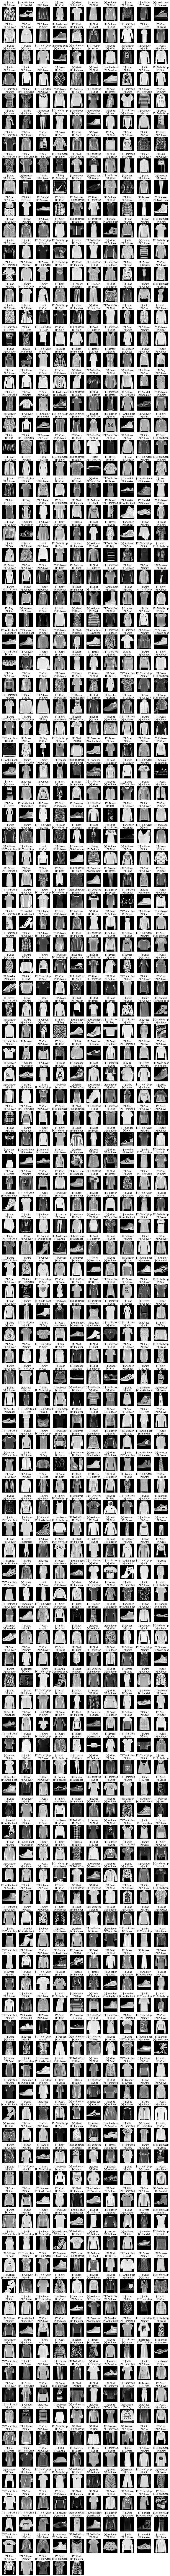

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

idx = np.nonzero(pre != y_test)[0]
pre_false_img = x_test[idx]
pre_false_label = y_test[idx] 
pre_false_pre = pre[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize = (16, 255))

z = zip(pre_false_img, pre_false_label, pre_false_pre)
# (i, (z1, z2, z3))

for i, (img, label, p) in enumerate(z):
    plt.subplot(height, width, i+1)
    plt.title("[T]:{}\n[P]:{}".format(trans[label], trans[p]))
    plt.axis("off")
    result = plt.imshow(img, cmap = "gray")

result